In [262]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import RFE

#  . Data Preparation:

In [4]:
df=pd.read_csv("heart_disease.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
features=df.drop(columns='num')
target=df['num']
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect


In [7]:
## Feature Engineering:

In [8]:
cat_col=[i for i in features.columns if features[i].dtype=='O']
num_col=[i for i in features.columns if features[i].dtype!='O']
features[num_col]

,age,trestbps,chol,fbs,thalch,oldpeak
0,63,145,233,True,150,2.3
1,41,135,203,False,132,0.0
2,57,140,192,False,148,0.4
3,52,118,186,False,190,0.0
4,57,110,201,False,126,1.5
...,...,...,...,...,...,...
903,53,125,0,False,120,1.5
904,62,166,170,False,120,3.0
905,56,170,0,False,123,2.5
906,56,144,208,True,105,NaN


In [9]:
ord=make_pipeline(OrdinalEncoder())

In [10]:
trans=ColumnTransformer([('ord',ord,cat_col)])

In [11]:
df1=pd.DataFrame(trans.fit_transform(features[cat_col]),columns=trans.get_feature_names_out())

In [12]:
df1

,ord__sex,ord__cp,ord__restecg,ord__exang,ord__slope,ord__thal
0,1.0,3.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,3.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
903,1.0,0.0,1.0,0.0,2.0,2.0
904,1.0,0.0,2.0,1.0,1.0,2.0
905,1.0,2.0,0.0,1.0,0.0,1.0
906,1.0,2.0,2.0,2.0,0.0,0.0


# Exploratory Data Analysis

In [15]:
df1.isnull().sum()

ord__sex        0
ord__cp         0
ord__restecg    0
ord__exang      0
ord__slope      0
ord__thal       0
dtype: int64

In [18]:
features[num_col].isnull().sum()

age          0
trestbps     0
chol         0
fbs          0
thalch       0
oldpeak     62
dtype: int64

In [19]:
simple=SimpleImputer(missing_values=np.nan,strategy='median')

In [30]:
df2=pd.DataFrame(simple.fit_transform(features[num_col]),columns=num_col)

In [32]:
df2

,age,trestbps,chol,fbs,thalch,oldpeak
0,63.0,145.0,233.0,1.0,150.0,2.3
1,41.0,135.0,203.0,0.0,132.0,0.0
2,57.0,140.0,192.0,0.0,148.0,0.4
3,52.0,118.0,186.0,0.0,190.0,0.0
4,57.0,110.0,201.0,0.0,126.0,1.5
...,...,...,...,...,...,...
903,53.0,125.0,0.0,0.0,120.0,1.5
904,62.0,166.0,170.0,0.0,120.0,3.0
905,56.0,170.0,0.0,0.0,123.0,2.5
906,56.0,144.0,208.0,1.0,105.0,0.5


In [34]:
std=StandardScaler()
df2=pd.DataFrame(std.fit_transform(df2[num_col]),columns=num_col)
df2

,age,trestbps,chol,fbs,thalch,oldpeak
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578
...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109
906,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952


In [36]:
df2.isnull().sum()

age         0
trestbps    0
chol        0
fbs         0
thalch      0
oldpeak     0
dtype: int64

In [38]:
df1.duplicated().sum()

671

In [40]:
df2.duplicated().sum()

4

In [42]:
df=pd.concat([df1,df2],axis=1)

In [44]:
df

,ord__sex,ord__cp,ord__restecg,ord__exang,ord__slope,ord__thal,age,trestbps,chol,fbs,thalch,oldpeak
0,1.0,3.0,0.0,0.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403
1,1.0,1.0,1.0,0.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718
2,1.0,0.0,1.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305
3,1.0,3.0,0.0,0.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718
4,1.0,0.0,1.0,1.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,1.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578
904,1.0,0.0,2.0,1.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874
905,1.0,2.0,0.0,1.0,0.0,1.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109
906,1.0,2.0,2.0,2.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952


In [46]:
df.duplicated().sum()

1

In [48]:
df.drop_duplicates(keep='first',inplace=True)

In [50]:
df

,ord__sex,ord__cp,ord__restecg,ord__exang,ord__slope,ord__thal,age,trestbps,chol,fbs,thalch,oldpeak
0,1.0,3.0,0.0,0.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403
1,1.0,1.0,1.0,0.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718
2,1.0,0.0,1.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305
3,1.0,3.0,0.0,0.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718
4,1.0,0.0,1.0,1.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,1.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578
904,1.0,0.0,2.0,1.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874
905,1.0,2.0,0.0,1.0,0.0,1.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109
906,1.0,2.0,2.0,2.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952


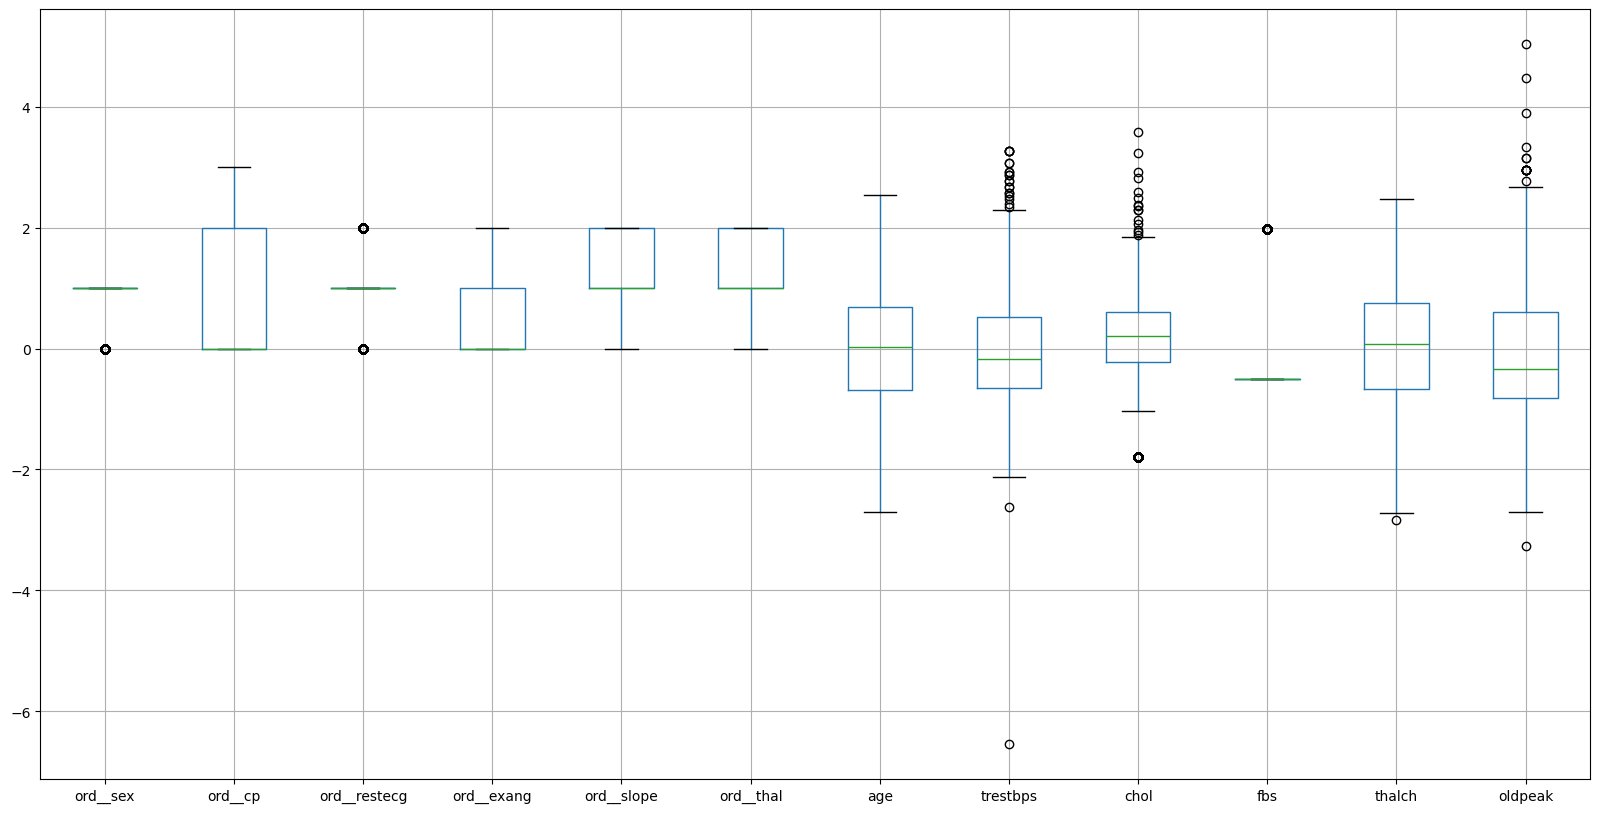

In [52]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [95]:
def o_r(df,columns):
    thres=2
    z_score=stats.zscore(df[columns])
    return df[(abs(z_score)<thres).all(axis=1)]

In [56]:
df=o_r(df,df.columns)

In [58]:
df

,ord__sex,ord__cp,ord__restecg,ord__exang,ord__slope,ord__thal,age,trestbps,chol,fbs,thalch,oldpeak
1,1.0,1.0,1.0,0.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718
2,1.0,0.0,1.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305
4,1.0,0.0,1.0,1.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578
5,1.0,0.0,0.0,0.0,2.0,0.0,1.333789,1.303036,0.236668,-0.505844,0.076258,1.354403
6,1.0,2.0,1.0,1.0,2.0,0.0,0.241249,-0.168247,0.665101,-0.505844,-0.297014,0.127813
...,...,...,...,...,...,...,...,...,...,...,...,...
897,1.0,0.0,1.0,1.0,0.0,1.0,1.006027,1.793463,-0.218542,-0.505844,-1.939408,1.543109
901,1.0,0.0,1.0,0.0,1.0,0.0,-0.305021,-1.149102,-1.798388,1.976894,-1.640791,-0.815718
903,1.0,0.0,1.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578
905,1.0,2.0,0.0,1.0,0.0,1.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109


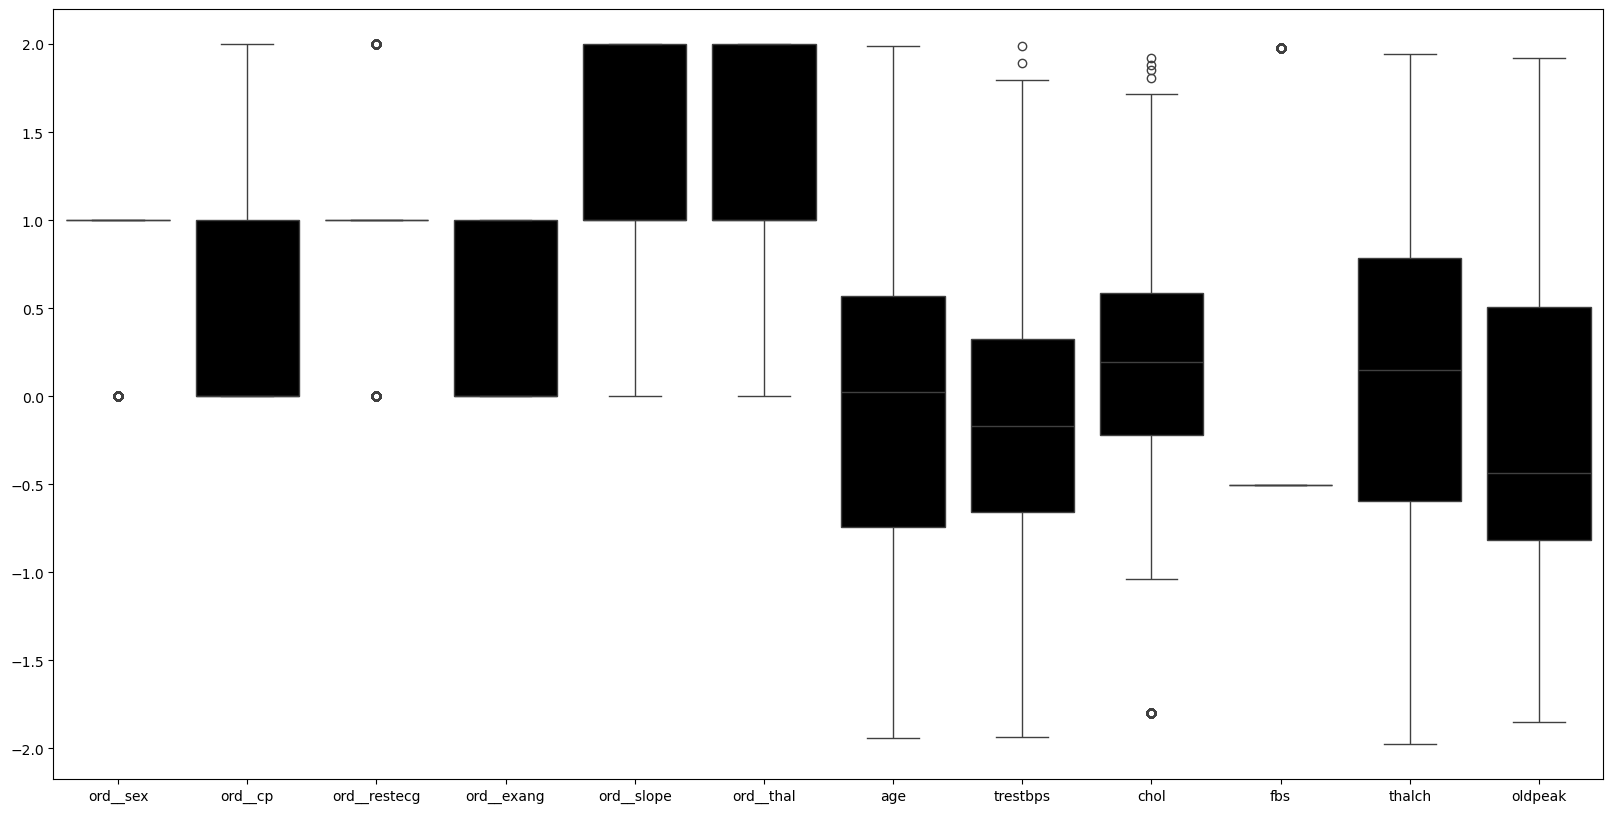

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,color='black')
plt.show()

In [62]:
df=pd.merge(df,target,left_index=True,right_index=True)
df

,ord__sex,ord__cp,ord__restecg,ord__exang,ord__slope,ord__thal,age,trestbps,chol,fbs,thalch,oldpeak,num
1,1.0,1.0,1.0,0.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718,0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305,0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578,0
5,1.0,0.0,0.0,0.0,2.0,0.0,1.333789,1.303036,0.236668,-0.505844,0.076258,1.354403,0
6,1.0,2.0,1.0,1.0,2.0,0.0,0.241249,-0.168247,0.665101,-0.505844,-0.297014,0.127813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,1.0,0.0,1.0,1.0,0.0,1.0,1.006027,1.793463,-0.218542,-0.505844,-1.939408,1.543109,4
901,1.0,0.0,1.0,0.0,1.0,0.0,-0.305021,-1.149102,-1.798388,1.976894,-1.640791,-0.815718,4
903,1.0,0.0,1.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578,4
905,1.0,2.0,0.0,1.0,0.0,1.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109,4


## Decision Tree Classification:

In [67]:
features=df.drop(columns='num')
target=df['num']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [243]:
dec=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [245]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [247]:
y_pred=dec.predict(x_test)

In [249]:
accuracy_score(y_test,y_pred)

0.6376811594202898

In [223]:
print(classification_report(y_test,y_pred))
import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        67
           1       0.61      0.51      0.56        49
           2       0.12      0.08      0.10        13
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         2

    accuracy                           0.63       138
   macro avg       0.38      0.33      0.33       138
weighted avg       0.59      0.63      0.60       138



## Hyperparameter Tuning:

In [227]:
params={'criterion':['entropy','gini'],'splitter':['best','random'],'max_depth':[2,3,4,5,6]}

In [229]:
grid=GridSearchCV(dec,params)

In [231]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [233]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

## Model Evaluation and Analysis:

[Text(0.5, 0.875, 'x[1] <= 0.006\ngini = 0.674\nsamples = 551\nvalue = [260, 153, 67, 57, 14]'),
 Text(0.25, 0.625, 'x[3] <= 0.068\ngini = 0.73\nsamples = 311\nvalue = [69.0, 125.0, 59.0, 46.0, 12.0]'),
 Text(0.125, 0.375, 'x[9] <= 0.998\ngini = 0.724\nsamples = 140\nvalue = [51, 44, 26, 12, 7]'),
 Text(0.0625, 0.125, 'gini = 0.679\nsamples = 110\nvalue = [48.0, 36.0, 15.0, 7.0, 4.0]'),
 Text(0.1875, 0.125, 'gini = 0.747\nsamples = 30\nvalue = [3, 8, 11, 5, 3]'),
 Text(0.375, 0.375, 'x[10] <= -0.127\ngini = 0.687\nsamples = 171\nvalue = [18, 81, 33, 34, 5]'),
 Text(0.3125, 0.125, 'gini = 0.664\nsamples = 123\nvalue = [12.0, 62.0, 17.0, 28.0, 4.0]'),
 Text(0.4375, 0.125, 'gini = 0.701\nsamples = 48\nvalue = [6, 19, 16, 6, 1]'),
 Text(0.75, 0.625, 'x[8] <= -0.894\ngini = 0.35\nsamples = 240\nvalue = [191, 28, 8, 11, 2]'),
 Text(0.625, 0.375, 'x[10] <= -0.628\ngini = 0.749\nsamples = 23\nvalue = [8, 6, 4, 4, 1]'),
 Text(0.5625, 0.125, 'gini = 0.7\nsamples = 10\nvalue = [2, 1, 4, 3, 0]'),


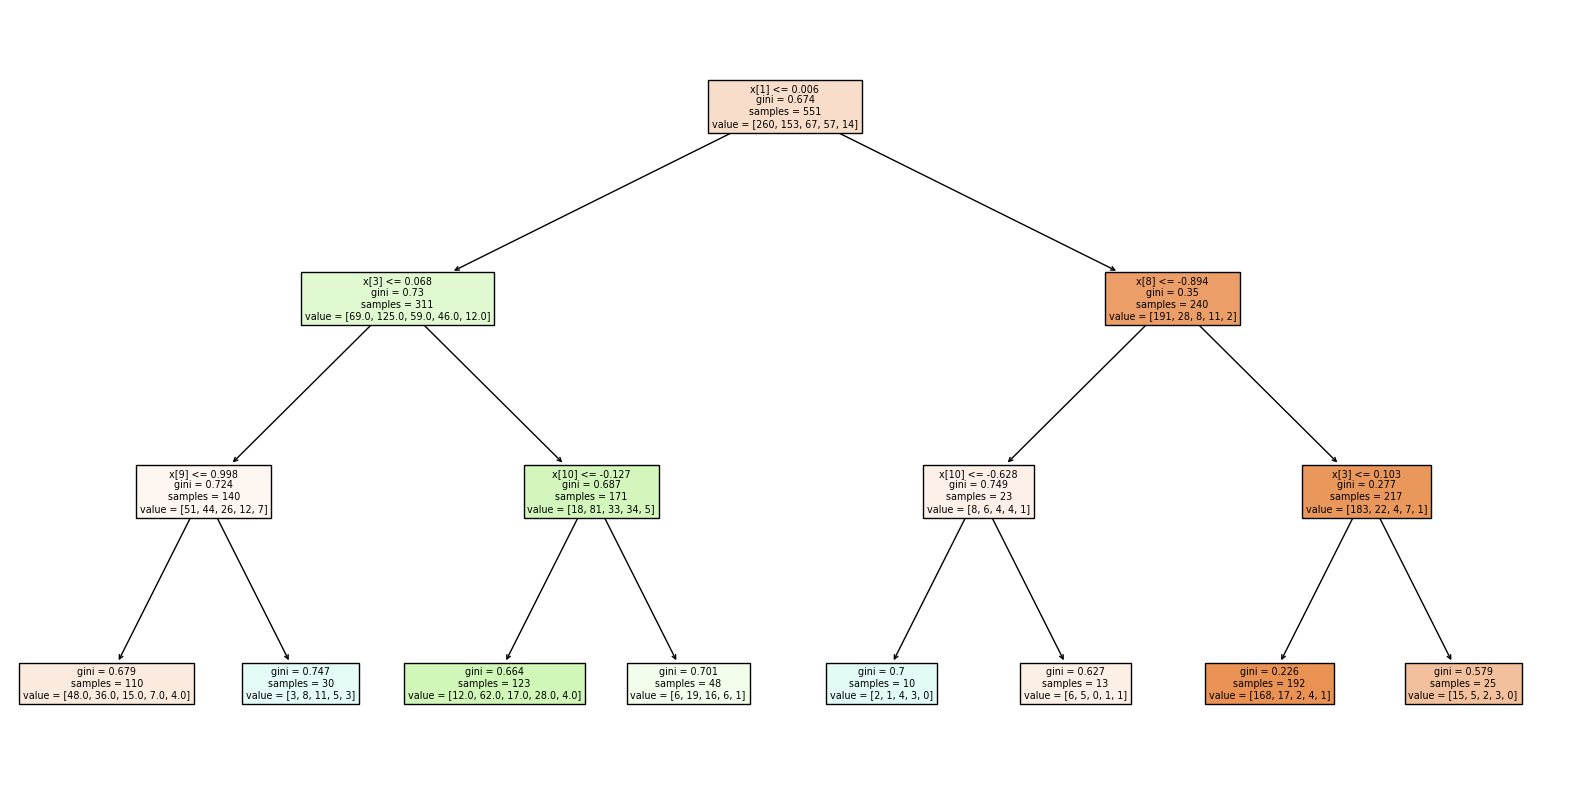

In [256]:
plt.figure(figsize=(20,10))
plot_tree(dec,filled=True)

In [258]:
## visualizing the important features

In [264]:
rfe=RFE(dec,n_features_to_select=6)

In [266]:
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
    n_features_to_select=6)

In [281]:
m1=rfe.support_
m1

array([False,  True, False,  True, False, False,  True, False,  True,
        True, False,  True])

In [270]:
a=np.array(features.columns)

In [272]:
a[m1]

array(['ord__cp', 'ord__exang', 'age', 'chol', 'fbs', 'oldpeak'],
      dtype=object)

## Interview Questions:

In [277]:
## What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [275]:
## max_depth: Limits the maximum depth of the tree. A smaller value prevents overfitting, while a larger value increases complexity.
## min_samples_split: The minimum number of samples required to split an internal node. Higher values can make the tree more robust.
## criterion: The function used to measure the quality of a split (gini for Gini impurity, entropy for Information Gain).

In [279]:
## criterion: The function used to measure the quality of a split (gini for Gini impurity, entropy for Information Gain).

In [ ]:
### Label Encoding assigns a unique numerical value to each category, which can introduce unintended ordinal relationships between categories.
### One-Hot Encoding creates binary columns for each category, ensuring that no ordinal relationships are implied, but it increases the number of features.